# Crime Analysis Detection

## Table Of Contents

- Project Description
- Libraries
- Data Ingestion
- Preliminary Data Analysis
- Data Cleaning
- Exploratory Data Analysis, Visualisations & Insights

## Project Description <a id = "project"></a>

This project involves analysing crime data in Chicago and drawing insights from our analysis which will prove useful in preventing future crimes. The data used for this analysis consists of various crimes perpetuated in different areas in Chicago and contains data like Location where crimes were committed, ward where crimes where located, date where crimes were committed among others. The project aims to answer the following questions:

#### Questions
* Proportion of solved cases compared to unsolved cases.
* Prevalent Primary Type of Crimes unsolved.
* Domestic vs Non - Domestic Crimes.
* The most efficient Ward.
* Wards where the most crimes occur.



## Libraries

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta

## Data Ingestion

In [2]:
# import gdown
# url = 'https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=drive_link'
# id = '1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X'
# gdown.download(id = id, output='Crimes.csv')


In [3]:
#Convert to csv to parquet to reduce time and space complexities
# df2 = pd.read_csv('Crimes.csv')
# df2.to_parquet('Crimes.parquet', index = False)

In [4]:
#Set display options for pandas tables
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [5]:
df = pd.read_parquet('Crimes.parquet')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


## Preliminary Data Analysis

In [6]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [7]:
#Statistics
df.describe(include='all')

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,7.784664e+06,7784660,7784664,7784664,7784664,7784664,7784664,7774283,7784664,7784664,...,7.169816e+06,7.171188e+06,7784664,7.697816e+06,7.697816e+06,7.784664e+06,7784664,7.697816e+06,7.697816e+06,7697816
unique,NaN,7784121,3207478,62845,404,36,544,215,2,2,...,NaN,NaN,26,NaN,NaN,NaN,5561,NaN,NaN,890516
top,NaN,HJ590004,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,...,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642148,913484,2026828,5749900,6708370,...,NaN,NaN,1642148,NaN,NaN,NaN,2787942,NaN,NaN,14272
mean,7.026439e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275420e+01,3.748472e+01,NaN,1.164601e+06,1.885783e+06,2.009944e+03,NaN,4.184218e+01,-8.767149e+01,NaN
std,3.502657e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.385106e+01,2.154115e+01,NaN,1.684658e+04,3.227531e+04,6.260628e+00,NaN,8.879598e-02,6.108257e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.792574e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152976e+06,1.859073e+06,2.005000e+03,NaN,4.176871e+01,-8.771367e+01,NaN
50%,7.029327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166110e+06,1.890730e+06,2.009000e+03,NaN,4.185591e+01,-8.766584e+01,NaN
75%,1.013113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176372e+06,1.909273e+06,2.015000e+03,NaN,4.190677e+01,-8.762819e+01,NaN


In [8]:
#Data dimensions
print('Features Count:', len(df.columns))
print('Data Shape:', df.shape)

Features Count: 22
Data Shape: (7784664, 22)


In [9]:
#Get Duplicate count
print('Duplicates count:', df.duplicated().sum())

Duplicates count: 0


In [10]:
#Get missing values
print('Missing Values:', df.isna().sum())

Missing Values: ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64


In [11]:
#Check for missing values in Case Number feature
df[df['Case Number'].isna() == True]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4981841,7049552,None,07/30/2009 03:00:00 AM,058XX N PAULINA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,40.0,77.0,14,1164170.0,1938694.0,2009,02/28/2018 03:56:25 PM,41.987401,-87.671539,"(41.987401038, -87.671539153)"
5286601,7610078,None,07/16/2010 02:56:00 PM,005XX W VAN BUREN ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,2.0,28.0,08B,1172646.0,1898435.0,2010,02/10/2018 03:50:01 PM,41.876745,-87.641559,"(41.876744768, -87.641559043)"
5992794,8475075,None,02/08/2012 10:00:00 PM,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,31.0,16.0,05,NaN,NaN,2012,05/04/2016 03:48:23 PM,NaN,NaN,None
7488610,7014449,None,07/10/2009 11:00:00 AM,082XX S HARPER AVE,0560,ASSAULT,SIMPLE,STREET,False,False,...,8.0,45.0,08A,1187910.0,1850555.0,2009,02/28/2018 03:56:25 PM,41.745008,-87.587042,"(41.74500765, -87.587041972)"


In [12]:
assert(len(df) != df['Case Number'].nunique()) # Our case number feature isn't unique


In [13]:
#View duplicates in Case number feature
first_duplicate = df[df['Case Number'].duplicated() == True]
second_duplicate = df[df['Case Number'].duplicated(keep='last') == True]
full_duplicates_df = pd.concat([first_duplicate, second_duplicate], axis = 0)
full_duplicates_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
5286601,7610078,None,07/16/2010 02:56:00 PM,005XX W VAN BUREN ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,2.0,28.0,08B,1172646.0,1898435.0,2010,02/10/2018 03:50:01 PM,41.876745,-87.641559,"(41.876744768, -87.641559043)"
5446727,7928668,HT155546,02/10/2011 11:42:00 AM,059XX W DIVISION ST,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,True,False,...,29.0,25.0,06,1136597.0,1907384.0,2011,02/10/2018 03:50:01 PM,41.902023,-87.773707,"(41.902023021, -87.773706834)"
5992794,8475075,None,02/08/2012 10:00:00 PM,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,31.0,16.0,05,NaN,NaN,2012,05/04/2016 03:48:23 PM,NaN,NaN,None
6860076,11764301,JC326085,06/28/2019 04:15:00 PM,042XX W MADISON ST,0460,BATTERY,SIMPLE,STREET,False,False,...,28.0,26.0,08B,1148193.0,1899677.0,2019,07/24/2019 04:15:49 PM,41.880659,-87.731311,"(41.880658696, -87.731311277)"
6866046,27137,JF445443,10/23/2022 04:28:00 AM,043XX S KEDZIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,15.0,58.0,01A,1155745.0,1875638.0,2022,10/30/2022 04:49:06 PM,41.814544,-87.704227,"(41.814544186, -87.704227463)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506611,27049,JF394963,09/13/2022 09:55:00 PM,005XX E 51ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,4.0,40.0,01A,1180910.0,1871322.0,2022,09/20/2022 04:53:29 PM,41.802158,-87.612053,"(41.80215809, -87.612052585)"
7711194,27274,JF528120,12/30/2022 10:20:00 PM,086XX S CONSTANCE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,8.0,45.0,01A,1190022.0,1848100.0,2022,01/06/2023 03:49:11 PM,41.738220,-87.579382,"(41.738220374, -87.579382217)"
7729488,27316,JG126633,01/23/2023 03:39:00 PM,029XX E 78TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,7.0,43.0,01A,1196973.0,1853908.0,2023,01/30/2023 03:52:36 PM,41.753988,-87.553723,"(41.753988038, -87.55372311)"
7753768,27363,JG168471,02/27/2023 11:15:00 PM,009XX E 80TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,8.0,44.0,01A,1184058.0,1852160.0,2023,03/06/2023 03:47:36 PM,41.749503,-87.601106,"(41.749502746, -87.601106068)"


In [14]:
#View duplicates
case_number_count = df['Case Number'].value_counts()
case_number_duplicates = case_number_count[case_number_count > 1]
case_number_duplicates

Case Number
HJ590004    6
HZ140230    6
JC470284    5
HP296582    5
HS256531    5
           ..
HH546846    2
HM443007    2
HV402064    2
JD281257    2
JA103468    2
Name: count, Length: 450, dtype: int64

In [15]:
#View full data where case numbercontain duplicates
df.loc[case_number_duplicates]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6,10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,05,1161628.0,1912157.0,2015,02/10/2018 03:50:01 PM,41.914636,-87.681631,"(41.914635603, -87.681630909)"
6,10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,05,1161628.0,1912157.0,2015,02/10/2018 03:50:01 PM,41.914636,-87.681631,"(41.914635603, -87.681630909)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None


In [16]:
df[df['Case Number'] == 'HJ590004']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7496023,2346,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,...,11.0,61.0,01A,1172943.0,1878840.0,2003,09/18/2022 04:45:51 PM,41.822968,-87.641049,"(41.822967958, -87.641048569)"
7496991,2347,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,...,11.0,61.0,01A,1172943.0,1878840.0,2003,09/18/2022 04:45:51 PM,41.822968,-87.641049,"(41.822967958, -87.641048569)"
7498004,2348,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,...,11.0,61.0,01A,1172943.0,1878840.0,2003,09/18/2022 04:45:51 PM,41.822968,-87.641049,"(41.822967958, -87.641048569)"
7500348,2350,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,...,11.0,61.0,01A,1172943.0,1878840.0,2003,09/18/2022 04:45:51 PM,41.822968,-87.641049,"(41.822967958, -87.641048569)"
7502026,2351,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,...,11.0,61.0,01A,1172943.0,1878840.0,2003,09/18/2022 04:45:51 PM,41.822968,-87.641049,"(41.822967958, -87.641048569)"
7502986,2349,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,...,11.0,61.0,01A,1172943.0,1878840.0,2003,09/18/2022 04:45:51 PM,41.822968,-87.641049,"(41.822967958, -87.641048569)"


In [17]:
#Check Year info
print('Earliest Year:', df['Year'].min())
print('Latest Year:', df['Year'].max())
print('No of Years:', df['Year'].nunique())

Earliest Year: 2001
Latest Year: 2023
No of Years: 23


## Data Cleaning

In [18]:
#Drop missing values
df_copy = df.copy()
df.dropna(axis = 0, inplace = True)

In [19]:
#New data shape
print('Data shape after dropping missing values:', df.shape)

Data shape after dropping missing values: (7084435, 22)


In [20]:
#Drop id feature
df.drop('ID', axis = 1, inplace = True)
#No of duplicates after removing ID feature
print('Duplicates No', df.duplicated().sum())

Duplicates No 156


In [21]:
#Remove duplicates
print('Data shape before duplicates removal:', df.shape)
df.drop_duplicates(keep = 'last', inplace = True)
print('Data shape after duplicates removal:', df.shape)

Data shape before duplicates removal: (7084435, 21)
Data shape after duplicates removal: (7084279, 21)


In [22]:
#Data type
df['Date'] = pd.to_datetime(df['Date'])
print(f'Date Datatype: {df['Date'].dtype}')
df['Updated On'] = pd.to_datetime(df['Updated On'])
print(f'Updated On Datatype: {df['Updated On'].dtype}')

Date Datatype: datetime64[ns]
Updated On Datatype: datetime64[ns]


In [23]:
#Rename column names
feature_con_space = [x for x in df.columns if ' ' in x]
df = df.rename(columns = {x: x.replace(' ', '_') for x in feature_con_space})
df

,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,...,21.0,71.0,05,1168430.0,1850165.0,2015,2018-02-10 15:50:01,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784659,JF420478,2022-09-01 05:00:00,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,...,44.0,6.0,26,1172497.0,1919410.0,2022,2023-01-03 15:46:28,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,JF420319,2022-07-08 00:00:00,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,...,9.0,49.0,11,1179966.0,1828818.0,2022,2023-01-03 15:46:28,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,JF420102,2022-09-27 11:00:00,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,...,5.0,43.0,06,1193181.0,1859005.0,2022,2023-01-03 15:46:28,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,JF420427,2022-09-03 10:25:00,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,...,45.0,11.0,18,1140553.0,1933418.0,2022,2023-01-03 15:46:28,41.973391,-87.758535,"(41.973391184, -87.758534512)"


## Exploratory Data Analysis, Visualisations & Insights


#### Feature Engineering

In [24]:

#Add new columns
df['Quarter'] = df['Date'].dt.quarter
df['Month_name'] = df['Date'].dt.month_name()
df['Month'] = df['Date'].dt.month
df[['Month', 'Month_name']]

,Month,Month_name
0,9,September
1,9,September
3,9,September
4,9,September
5,9,September
...,...,...
7784659,9,September
7784660,7,July
7784661,9,September
7784662,9,September


In [25]:
#Add case duration feature to store difference in time when the case began and was updated
df['Case_Duration'] = list(map(lambda x: relativedelta(x[1], x[0]).years, zip(df['Date'], df['Updated_On'])))
df['Case_Duration']

0          2
1          2
3          2
4          2
5          2
          ..
7784659    0
7784660    0
7784661    0
7784662    0
7784663    0
Name: Case_Duration, Length: 7084279, dtype: int64

#### Analysis & Visualisation

##### Question 1

In [26]:
#Value count od Arrest column
df['Arrest'].value_counts()

Arrest
False    5250515
True     1833764
Name: count, dtype: int64

<Axes: title={'left': 'Solved Cases vs Unsolved Cases'}, xlabel='Arrest', ylabel=' '>

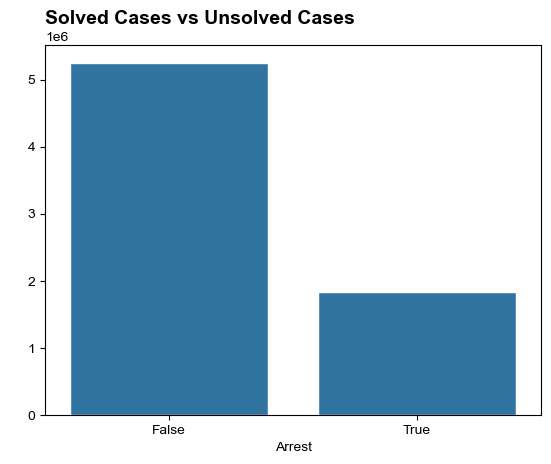

In [27]:
#Visualise Top 10 crimes
df_arrest =  df['Arrest'].value_counts()
plt.title('Solved Cases vs Unsolved Cases', size = 14, loc = 'left', fontweight = 'bold')
plt.ylabel(' ')
sns.set_palette("viridis")
sns.set_style('darkgrid')
sns.barplot(df_arrest)


#### Observations
From the visualisation above, we observe that the number of cases where arrests were made were significantly lower than the number of cases of where no arrests were registered. The rate of unsolved cases is a source of concern, so we investigate further.

##### Question 2

In [28]:
#Cases where no arrests were made
df_unsolved = df[df['Arrest'] == False]
print(f'Crime Types:\n{df_unsolved['Primary_Type'].value_counts()}')

Crime Types:
Primary_Type
THEFT                                1335766
BATTERY                              1013958
CRIMINAL DAMAGE                       758335
BURGLARY                              368366
ASSAULT                               367460
OTHER OFFENSE                         362807
MOTOR VEHICLE THEFT                   313192
DECEPTIVE PRACTICE                    262795
ROBBERY                               243086
CRIMINAL TRESPASS                      59808
OFFENSE INVOLVING CHILDREN             40141
WEAPONS VIOLATION                      26313
CRIM SEXUAL ASSAULT                    20491
SEX OFFENSE                            19241
PUBLIC PEACE VIOLATION                 16991
ARSON                                  10444
HOMICIDE                                6426
CRIMINAL SEXUAL ASSAULT                 5477
KIDNAPPING                              5381
NARCOTICS                               4178
STALKING                                3849
INTIMIDATION                 

<Axes: title={'left': 'Top ten most frequently committed unsolved crimes in Chicago'}, xlabel='Crime Count', ylabel=' '>

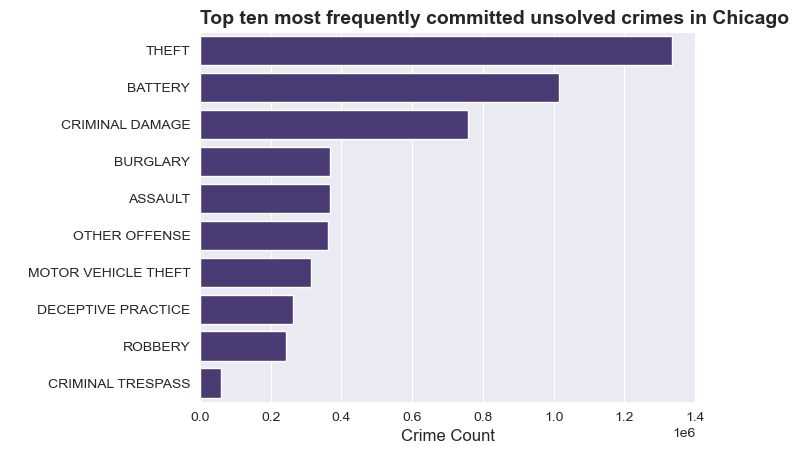

In [29]:
#Visualise Top 10 crimes
df_top10 =  df_unsolved['Primary_Type'].value_counts().nlargest(10)
plt.title('Top ten most frequently committed unsolved crimes in Chicago', size = 14, loc = 'left', fontweight = 'bold')
plt.xlabel('Crime Count', size = 12)
plt.ylabel(' ')
sns.set_palette("viridis", n_colors = 10)
sns.set_style('darkgrid')
sns.barplot(x = df_top10.nlargest(10).values, y =  df_top10.nlargest(10).index)


#### Question 3

In [30]:


df_2006 = df_unsolved[(df_unsolved['Year'] == 2001) | (df_unsolved['Year'] == 2002) | (df_unsolved['Year'] == 2003) | (df_unsolved['Year'] == 2004) | (df_unsolved['Year'] == 2005) | (df_unsolved['Year'] == 2006)]['Year'].value_counts()
df_2012 = df_unsolved[(df_unsolved['Year'] == 2007) | (df_unsolved['Year'] == 2008) | (df_unsolved['Year'] == 2009) | (df_unsolved['Year'] == 2010) | (df_unsolved['Year'] == 2011) | (df_unsolved['Year'] == 2012)]['Year'].value_counts()
df_2018 = df_unsolved[(df_unsolved['Year'] == 2013) | (df_unsolved['Year'] == 2014) | (df_unsolved['Year'] == 2015) | (df_unsolved['Year'] == 2016) | (df_unsolved['Year'] == 2017) | (df_unsolved['Year'] == 2018)]['Year'].value_counts()
df_2023 = df_unsolved[(df_unsolved['Year'] == 2019) | (df_unsolved['Year'] == 2020) | (df_unsolved['Year'] == 2021) | (df_unsolved['Year'] == 2022) | (df_unsolved['Year'] == 2023) ]['Year'].value_counts()



Text(0.5, 1.0, '2019 - 2023 Unsolved Crime Distribution')

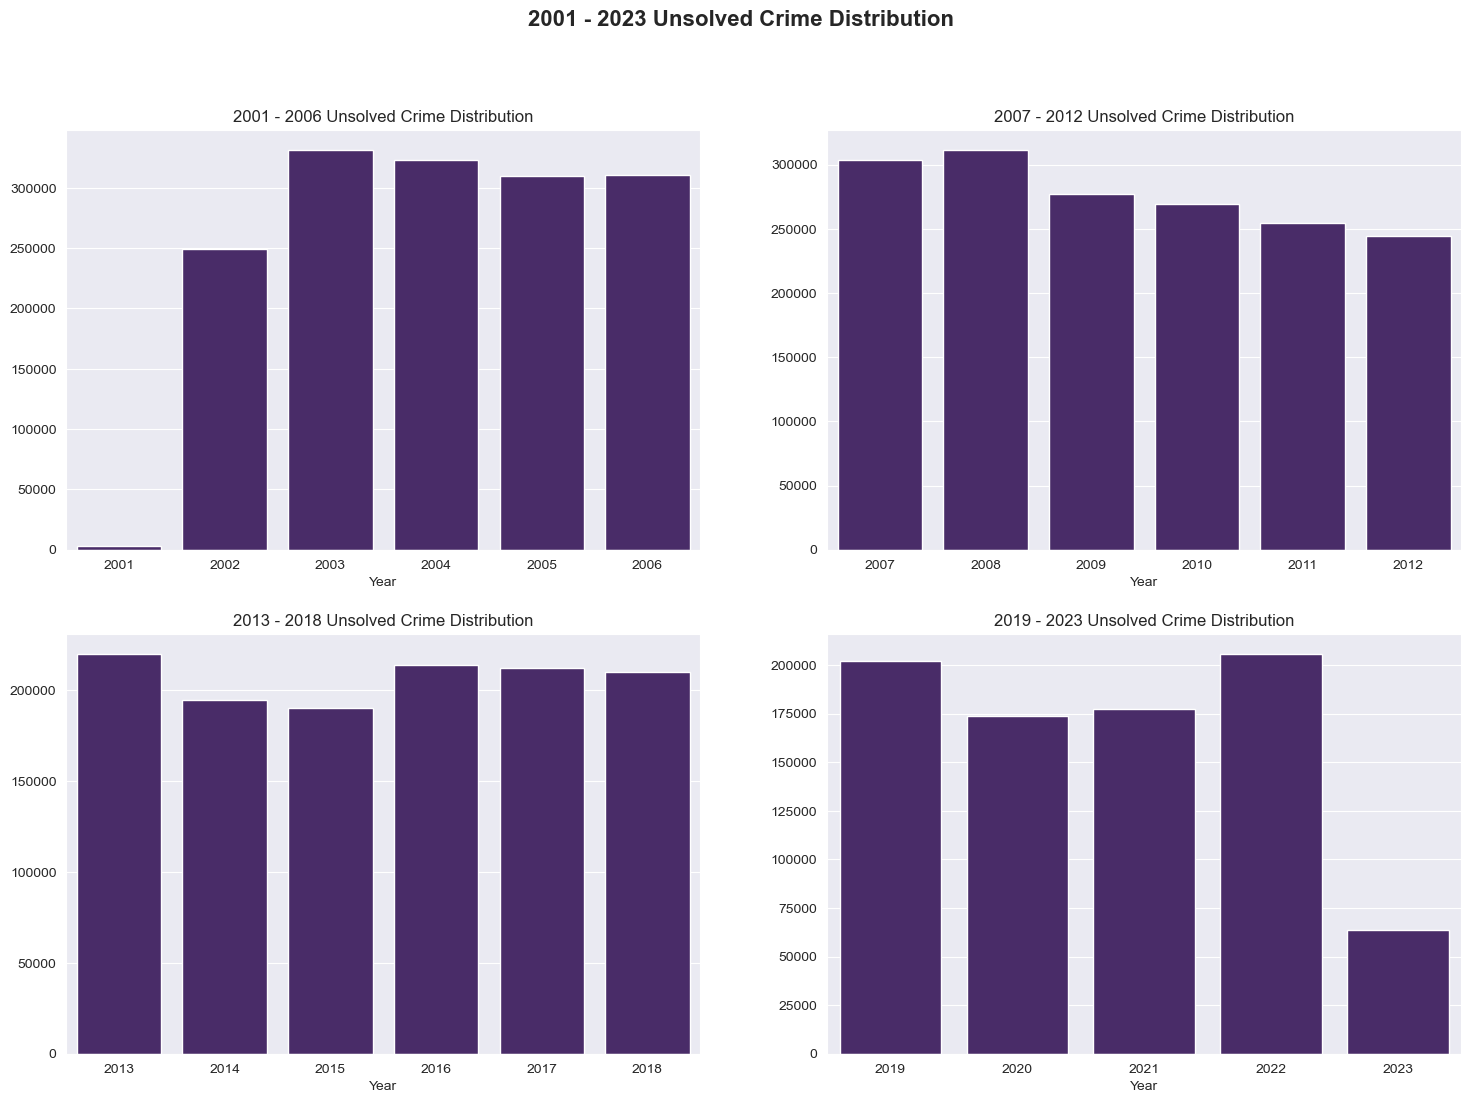

In [31]:
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
plt.suptitle('2001 - 2023 Unsolved Crime Distribution', fontweight = 'bold', size = 16)
sns.barplot(y = df_2006.values, x = df_2006.index, ax=axes[0,0])
sns.set_palette('viridis')
axes[0,0].set_title('2001 - 2006 Unsolved Crime Distribution')

sns.barplot(y = df_2012.values, x = df_2012.index, ax=axes[0,1])
axes[0,1].set_title('2007 - 2012 Unsolved Crime Distribution')

sns.barplot(y = df_2018.values, x = df_2018.index, ax=axes[1,0])
axes[1,0].set_title('2013 - 2018 Unsolved Crime Distribution')

sns.barplot(y = df_2023.values, x = df_2023.index, ax=axes[1,1])
axes[1,1].set_title('2019 - 2023 Unsolved Crime Distribution')



#### Observations
From our visualisation above, the crimes with the highest count ranges from Theft to criminal Trespass. In fact, we see that there were more than 1.3 million cases of theft in Chicago and more than 1 million cases of Battery. 

In addition to the above, we see a sharp increase in crime rate from 2001 to 2002, then a steady unsolved crime rate from 2002 to 2008 and a decline from 2008 till 2023. We observe that there was a decrease in unsolved crime rate from 2022 to 2023. Specifically there was a 69% increment in unsolved crime rate as compared to 2022.

#### Question 4

Text(0, 0.5, ' ')

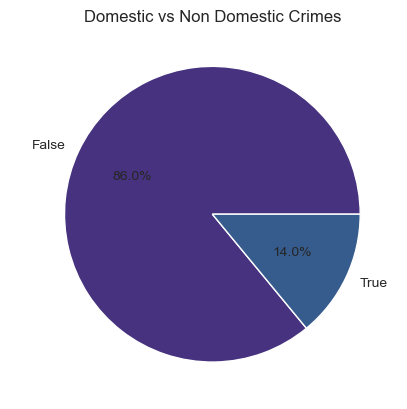

In [32]:
df_domestic = df['Domestic'].value_counts()
plt.title('Domestic vs Non Domestic Crimes')
df_domestic.plot(kind='pie', autopct = '%1.1f%%')
plt.ylabel(' ')

Based on the visualisation above, we note that 14% of the total crimes committed were domestic crimes.

#### Question 5

In [33]:
#Cases where arrests were made
df_solved = df[df['Arrest'] == True]
ward_arrest = df_solved['Ward'].value_counts()


Text(0.5, 1.0, 'Top 10 least efficient wards by arrests made')

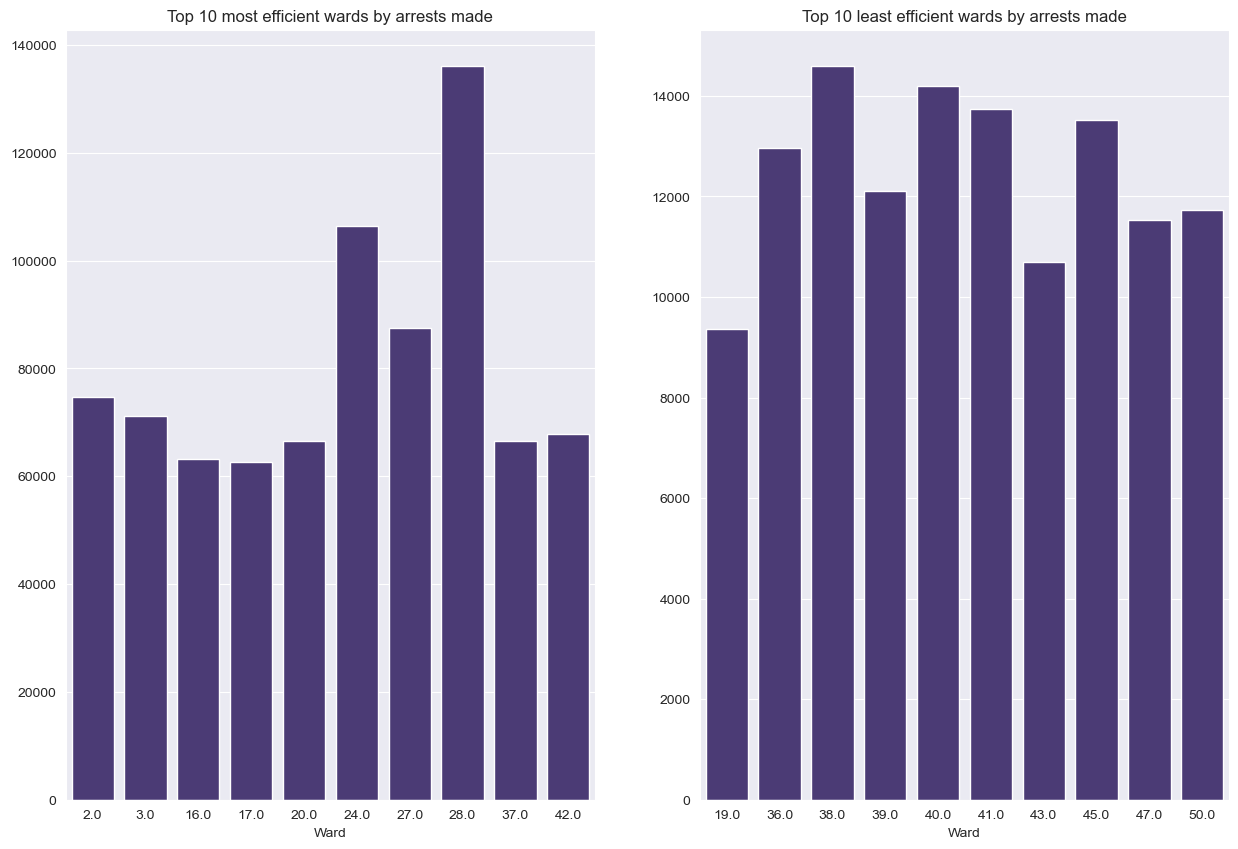

In [34]:
top_10_wards =  ward_arrest.nlargest(10)
bottom_10_wards =  ward_arrest.nsmallest(10)

fig, axes = plt.subplots(1, 2, figsize = (15, 10))
sns.barplot(x = top_10_wards.index, y = top_10_wards.values, ax = axes[0])
axes[0].set_title('Top 10 most efficient wards by arrests made')
sns.set_style(style= 'darkgrid')
sns.set_palette('viridis')

sns.barplot(x = bottom_10_wards.index, y = bottom_10_wards.values, ax=axes[1])
axes[1].set_title('Top 10 least efficient wards by arrests made')




#### Observation
Based on the visualisation above, we observe that ward 28 has the highest number of arrests made with over 130,000 arrests made. On the other hand, the ward with the least number of arrests is ward 19 with only more than 9000 arrests registered.

#### Question 5

In [35]:
#Check if arrests were made in all wards present in our dataset.
assert(all(df['Ward'].value_counts().index.sort_values() == df_solved['Ward'].value_counts().index.sort_values()))

In [36]:
crimes_commited = df['Ward'].value_counts()
arrest_made = df_solved['Ward'].value_counts()
crimes_commited_df = pd.DataFrame({'Index': crimes_commited.index, 'No_of_Crimes': crimes_commited.values})
arrests_made_df = pd.DataFrame({'Index': arrest_made.index, 'No_of_Arrests': arrest_made.values})
crimes_vs_arrests = crimes_commited_df.merge(arrests_made_df, on = 'Index', how = 'inner')
crimes_vs_arrests


,Index,No_of_Crimes,No_of_Arrests
0,28.0,324714,136040
1,42.0,294115,67794
2,24.0,277580,106479
3,27.0,266433,87576
4,2.0,251576,74765
5,6.0,234963,57941
6,17.0,234910,62561
7,20.0,232831,66500
8,3.0,216316,71199
9,21.0,214890,54715


<Axes: title={'center': 'No of Crimes vs No_of_Arrests'}, xlabel='No_of_Crimes', ylabel='No_of_Arrests'>

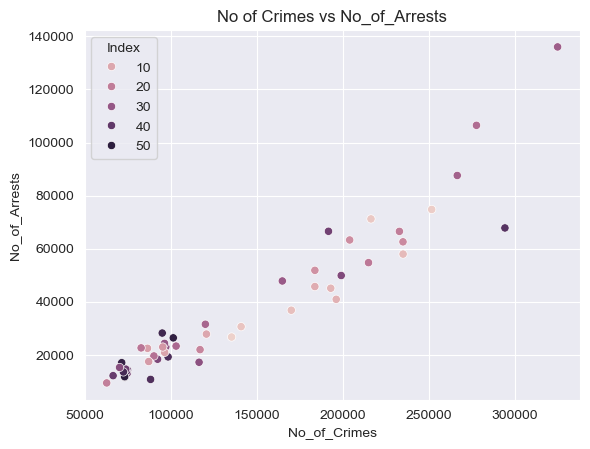

In [37]:
plt.title('No of Crimes vs No_of_Arrests')
sns.scatterplot(data = crimes_vs_arrests, x = 'No_of_Crimes', y ='No_of_Arrests', hue='Index')

#### Observations
From the the visualisation above, we observe that number of arrests correlates positively with the number of crimes committed. Furthermore, we notice that most crimes occur in ward 1 to ward 30, subsequently most of the arrests were also made there.